# pyLatt examples

Some examples just for demo/remind purpose

In [1]:
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use(['dark_background'])

import pylatt as latt
import pandas as pd

## Elements and beamlines

In [2]:
import inspect
print([m[0] for m in inspect.getmembers(latt, inspect.isclass) if m[1].__module__=='pylatt'])

['aper', 'beamline', 'bend', 'cell', 'drif', 'kick', 'kmap', 'matr', 'moni', 'octu', 'quad', 'rfca', 'sext', 'wigg']


## Elements definition and usage

In [3]:
# --- define a drift
d01 = latt.drif('d01',L=1.234)
print(d01)

print('\ncoordinate transport matrix:')
print((pd.DataFrame(d01.tm)))

print('\nTwiss transport matrix in x plane:')
print((pd.DataFrame(d01.tx)))

d01: drif,L=1.234

coordinate transport matrix:
     0      1    2      3    4    5
0  1.0  1.234  0.0  0.000  0.0  0.0
1  0.0  1.000  0.0  0.000  0.0  0.0
2  0.0  0.000  1.0  1.234  0.0  0.0
3  0.0  0.000  0.0  1.000  0.0  0.0
4  0.0  0.000  0.0  0.000  1.0  0.0
5  0.0  0.000  0.0  0.000  0.0  1.0

Twiss transport matrix in x plane:
     0      1         2
0  1.0 -2.468  1.522756
1 -0.0  1.000 -1.234000
2  0.0 -0.000  1.000000


In [4]:
# --- update the drift length, its associated info/matrices will be updated auto
d01.L = 2.96
print(d01)
print('\ncoordinate transport matrix:')
print((pd.DataFrame(d01.tm)))
print('\nTwiss transport matrix in x plane:')
print((pd.DataFrame(d01.tx)))

d01: drif,L=2.96

coordinate transport matrix:
     0     1    2     3    4    5
0  1.0  2.96  0.0  0.00  0.0  0.0
1  0.0  1.00  0.0  0.00  0.0  0.0
2  0.0  0.00  1.0  2.96  0.0  0.0
3  0.0  0.00  0.0  1.00  0.0  0.0
4  0.0  0.00  0.0  0.00  1.0  0.0
5  0.0  0.00  0.0  0.00  0.0  1.0

Twiss transport matrix in x plane:
     0     1       2
0  1.0 -5.92  8.7616
1 -0.0  1.00 -2.9600
2  0.0 -0.00  1.0000


In [5]:
# --- quad
q01 = latt.quad('q01',L=0.25,K1=2.0)
print(q01)
print('\ncoordinate transport matrix:')
print((pd.DataFrame(q01.tm)))
print('\nTwiss transport matrix in x plane:')
print((pd.DataFrame(q01.tx)))

q01: quad,L=0.25,K1=2,tilt=0

coordinate transport matrix:
          0         1         2         3    4    5
0  0.938148  0.244824  0.000000  0.000000  0.0  0.0
1 -0.489648  0.938148  0.000000  0.000000  0.0  0.0
2  0.000000  0.000000  1.063154  0.255241  0.0  0.0
3  0.000000  0.000000  0.510482  1.063154  0.0  0.0
4  0.000000  0.000000  0.000000  0.000000  1.0  0.0
5  0.000000  0.000000  0.000000  0.000000  0.0  1.0

Twiss transport matrix in x plane:
          0         1         2
0  0.880122 -0.459363  0.059939
1  0.459363  0.760245 -0.229681
2  0.239755  0.918725  0.880122


In [6]:
# --- create or modify quad to skew
q01.tilt = np.pi/4
print(q01)
print('\ncoordinate transport matrix:')
print((pd.DataFrame(q01.tm)))
print('\nTwiss transport matrix in x plane:')
print((pd.DataFrame(q01.tx)))

q01: quad,L=0.25,K1=2,tilt=0.785398

coordinate transport matrix:
          0         1         2         3    4    5
0  1.000651  0.250033 -0.062503 -0.005208  0.0  0.0
1  0.010417  1.000651 -0.500065 -0.062503  0.0  0.0
2 -0.062503 -0.005208  1.000651  0.250033  0.0  0.0
3 -0.500065 -0.062503  0.010417  1.000651  0.0  0.0
4  0.000000  0.000000  0.000000  0.000000  1.0  0.0
5  0.000000  0.000000  0.000000  0.000000  0.0  1.0

Twiss transport matrix in x plane:
          0         1         2
0  1.001303 -0.500391  0.062516
1 -0.010424  1.005209 -0.250195
2  0.000109 -0.020847  1.001303


In [7]:
# --- ID used radia kickmap model
ivu20km = latt.kmap("ivu20km",L=1.5,kmap1fn=None,
 kmap2fn="/Users/yli/Dropbox/Li_Yongjun/pylatt-dev/kickmap/U20_ASBUILT_G52.txt",E=3.0)
print(ivu20km)
print('\ncoordinate transport matrix:')
print((pd.DataFrame(ivu20km.tm)))
print('\nTwiss transport matrix in x plane:')
print((pd.DataFrame(ivu20km.tm)))

ivu20km: kmap, L = 1.5, E =  3.0000, kmap1fn = 'None', kmap2fn = '/Users/yli/Dropbox/Li_Yongjun/pylatt-dev/kickmap/U20_ASBUILT_G52.txt'

coordinate transport matrix:
          0         1         2         3    4    5
0  1.000001  1.500001  0.000000  0.000000  0.0  0.0
1  0.000001  1.000001  0.000000  0.000000  0.0  0.0
2  0.000000  0.000000  0.994121  1.496919  0.0  0.0
3  0.000000  0.000000 -0.007831  0.994120  0.0  0.0
4  0.000000  0.000000  0.000000  0.000000  1.0  0.0
5  0.000000  0.000000  0.000000  0.000000  0.0  1.0

Twiss transport matrix in x plane:
          0         1         2         3    4    5
0  1.000001  1.500001  0.000000  0.000000  0.0  0.0
1  0.000001  1.000001  0.000000  0.000000  0.0  0.0
2  0.000000  0.000000  0.994121  1.496919  0.0  0.0
3  0.000000  0.000000 -0.007831  0.994120  0.0  0.0
4  0.000000  0.000000  0.000000  0.000000  1.0  0.0
5  0.000000  0.000000  0.000000  0.000000  0.0  1.0


In [8]:
# --- ID used radia kickmap model
dw100g1c08d = latt.kmap("dw100g1c08d",L=3.4,nkick=10,kmap1fn=None,kmap2fn="/Users/yli/Dropbox/Li_Yongjun/pylatt-dev/kickmap/W100_DF_asbuilt.txt",E=3.0)
print(dw100g1c08d)
print('\ncoordinate transport matrix:')
latt.printmatrix(dw100g1c08d.tm,format='%15e')
print('\nTwiss transport matrix in x plane:')
latt.printmatrix(dw100g1c08d.tx,format='%15e')

dw100g1c08d: kmap, L = 3.4, E =  3.0000, kmap1fn = 'None', kmap2fn = '/Users/yli/Dropbox/Li_Yongjun/pylatt-dev/kickmap/W100_DF_asbuilt.txt'

coordinate transport matrix:
   1.000149e+00     3.400184e+00     0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00  
   8.770930e-05     1.000149e+00     0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00  
   0.000000e+00     0.000000e+00     9.092395e-01     3.287191e+00     0.000000e+00     0.000000e+00  
   0.000000e+00     0.000000e+00    -5.271479e-02     9.092395e-01     0.000000e+00     0.000000e+00  
   0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00     1.000000e+00     0.000000e+00  
   0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00     1.000000e+00  

Twiss transport matrix in x plane:
   1.000298e+00    -6.801383e+00     1.156125e+01  
  -8.772238e-05     1.000596e+00    -3.400691e+00  
   7.692922e-09    -1.754448e-04     1.000298e+00  


## Particle tracking through a element using 4th order symplectic kick-drift

In [9]:
b = latt.bend('b',L=1,K1=0.5,angle=0.02,e1=0.1,e2=0.1,nkick=20)

# --- single particle, using one row or one column
print('single particle in col format')
x0 = [0.001,0.0003,-0.001,-0.004,0,0.01]
print(b.sympass4(x0,fast=0))
print

print('single particle in row format')
print(b.sympass4(x0,fast=1))
print

# --- multiple particles, using multipole columns
print('multi-particles in col format')
x0 = np.array([[0.001,0.0003,-0.001,-0.004,0,0.01],
               [0.002,0.0001,-0.002,-0.003,0,-0.01],
               [-0.001,-0.0003,0.001,0.004,0,0.005]]).transpose()
print(b.sympass4(x0,fast=1))
print

# --- compare with matrix
print('just linear matrix transport')
print(b.tm.dot(x0))

single particle in col format
[[  1.13595366e-03]
 [ -3.91400119e-05]
 [ -5.59402854e-03]
 [ -5.55479285e-03]
 [  3.26084100e-05]
 [  1.00000000e-02]]

single particle in row format
[  1.13595366e-03  -3.91400119e-05  -5.59402854e-03  -5.55479285e-03
   3.26084100e-05   1.00000000e-02]

multi-particles in col format
[[  1.13595366e-03   1.51509582e-03  -9.90805411e-04]
 [ -3.91400119e-05  -1.02958398e-03   3.17638205e-04]
 [ -5.59402854e-03  -5.78128715e-03   5.59708846e-03]
 [ -5.55479285e-03  -4.87062946e-03   5.56301333e-03]
 [  3.26084100e-05   4.45276718e-05  -1.02602255e-05]
 [  1.00000000e-02  -1.00000000e-02   5.00000000e-03]]

just linear matrix transport
[[  1.13340186e-03   1.51977592e-03  -9.89553456e-04]
 [ -4.41482017e-05  -1.02102308e-03   3.20035455e-04]
 [ -5.60018025e-03  -5.77315230e-03   5.60018025e-03]
 [ -5.57132070e-03  -4.85057296e-03   5.57132070e-03]
 [  2.19196357e-05   3.70937725e-05  -2.09443597e-05]
 [  1.00000000e-02  -1.00000000e-02   5.00000000e-03]]


## A beamline with initial condition

a beam line is a LIST of multiple (>=1) magnet element sequence (periodical/non-periodical structure)

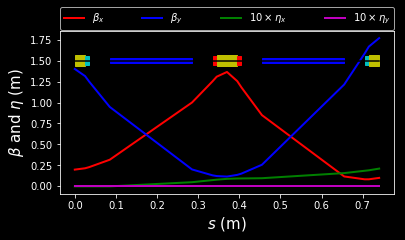


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  2.000e-01  0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.400e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  7.400e-01  1.014e-01 -6.147e-01  3.924e-01  2.119e-02  1.058e-01  1.767e+00  1.520e-01  3.335e-01  0.000e+00  0.000e+00

Tune: nux =       0.392, nuy =       0.334




In [10]:
# --- elements
d1 = latt.drif('d1',L=0.05)
b1 = latt.bend('b1',L=0.2,angle=0.05,e1=0.025,e2=0.025)
qf = latt.quad('qf',L=0.025,K1=100)
qd = latt.quad('qd',L=0.025,K1=-100)
sf = latt.sext('sf',L=0.01,K2=5)
od = latt.octu('od',L=0.01,K3=-15)

# --- beamline
bl = [qd,od,d1,b1,d1,sf,qf,qf,sf,d1,b1,d1,od,qd]

# --- beamline with a given initial Twiss
line = latt.beamline(bl,betax0=0.2,betay0=1.4)

# --- plot beamline Twiss
line.plttwiss(figsize=(6,3),surflvl=1.5)

print(line)

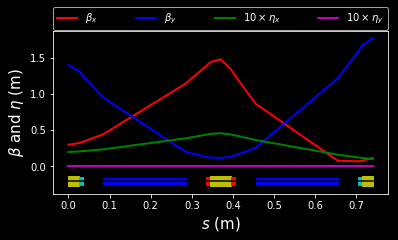

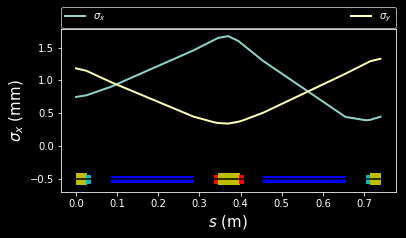


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  3.000e-01  0.000e+00  0.000e+00  2.000e-02  0.000e+00  1.400e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  7.400e-01  1.190e-01 -1.128e+00  4.218e-01  1.009e-02 -4.947e-02  1.767e+00  1.520e-01  3.335e-01  0.000e+00  0.000e+00

Tune: nux =       0.422, nuy =       0.334




In [11]:
# --- update beamline's initial condition
line.betax0 = 0.3
line.etax0 = 0.02

line.plttwiss(figsize=(6,3),surflvl=-0.2)
line.pltsigma(figsize=(6,3),surflvl=-0.5)
print(line)

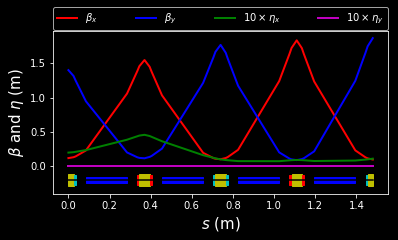

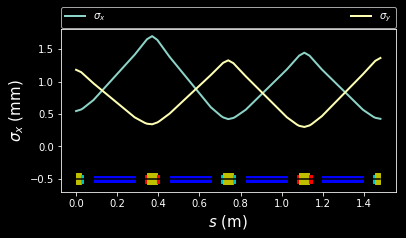


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  1.200e-01  0.000e+00  0.000e+00  2.000e-02  0.000e+00  1.400e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.480e+00  9.924e-02  8.038e-02  6.808e-01  1.118e-02  5.495e-02  1.866e+00 -1.112e-01  6.987e-01  0.000e+00  0.000e+00

Tune: nux =       0.681, nuy =       0.699




In [12]:
# --- the beamline list can be replaced or updated 
line.betax0 = 0.12
line.etax0 = 0.02
line.bl = line.bl*2
line.plttwiss(figsize=(6,3),surflvl=-0.2)
line.pltsigma(figsize=(6,3),surflvl=-0.5)
print(line)

In [13]:
# --- hidden attributes for a beamline
attrs = line.__dict__.keys()
attrs.sort()
print attrs

['_E', '_L', '_alfax', '_alfax0', '_alfay', '_alfay0', '_betax', '_betax0', '_betay', '_betay0', '_bl', '_dxy', '_emitx', '_emity', '_etax', '_etax0', '_etaxp', '_etaxp0', '_etay', '_etay0', '_etayp', '_etayp0', '_gamax', '_gamay', '_mux', '_muy', '_nux', '_nuy', '_s', '_sige', '_sigx', '_sigy', '_twx', '_twy']


In [14]:
# --- search specific elements with type and name
line.getElements('quad',unique=True)

[qd: quad,L=0.025,K1=-100,tilt=0, qf: quad,L=0.025,K1=100,tilt=0]

In [15]:
line.getElements('quad',unique=False)

[qd: quad,L=0.025,K1=-100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0,
 qd: quad,L=0.025,K1=-100,tilt=0,
 qd: quad,L=0.025,K1=-100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0,
 qd: quad,L=0.025,K1=-100,tilt=0]

In [16]:
# --- for a given logitudinal s position, find its two neighboring elements indexes 
n0,n1 = line.getSIndex(0.4)
print(n0,n1)
print(line.bl[n0].name,line.bl[n1].name)
print([(i,a.name) for i,a in enumerate(line.bl)])

(8, 9)
('sf', 'd1')
[(0, 'qd'), (1, 'od'), (2, 'd1'), (3, 'b1'), (4, 'd1'), (5, 'sf'), (6, 'qf'), (7, 'qf'), (8, 'sf'), (9, 'd1'), (10, 'b1'), (11, 'd1'), (12, 'od'), (13, 'qd'), (14, 'qd'), (15, 'od'), (16, 'd1'), (17, 'b1'), (18, 'd1'), (19, 'sf'), (20, 'qf'), (21, 'qf'), (22, 'sf'), (23, 'd1'), (24, 'b1'), (25, 'd1'), (26, 'od'), (27, 'qd')]


In [17]:
# --- get the indexes for specific type 
line.getIndex(['quad','drif'])

[0, 2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 20, 21, 23, 25, 27]

In [18]:
print(line.getIndex('quad'))
line.getElements('quad','qf')

[0, 6, 7, 13, 14, 20, 21, 27]


[qf: quad,L=0.025,K1=100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0]

In [19]:
# --- save a beamline to a file, which can be imported in the future
line.savefile('savefile.py',comment="whatever it is")
!cat savefile.py 

# --- comments:
# --- whatever it is

import pylatt as latt

# === Element definition:
b1 = latt.bend("b1",L=0.2,angle=0.05,e1=0.025,e2=0.025,K1=0.0,K2=0.0,hgap=0.0,fint=0.5)
d1 = latt.drif("d1",L=0.05)
od = latt.octu("od",L=0.01,K3=-15.0)
qd = latt.quad("qd",L=0.025,K1=-100.0,tilt=0.0)
qf = latt.quad("qf",L=0.025,K1=100.0,tilt=0.0)
sf = latt.sext("sf",L=0.01,K2=5.0)

# === Beam Line sequence:
BL = [qd, od, d1, b1, d1, sf, qf, qf, sf, d1, b1, d1, od, qd, qd, od, d1, 
   b1, d1, sf, qf, qf, sf, d1, b1, d1, od, qd]
ring = latt.cell(BL)


In [20]:
# --- save a beamline to ELEGANT format
line.saveLte('saveLte.lte')
!cat saveLte.lte

! === Convert from Yongjun Li's pylatt input 
! === Caution: some elements need to be adjusted manually

! === Element definition:
b1: csbend, L=0.2, angle=0.05, e1=0.025, e2=0.025
d1: drif,L=0.05
od: koct, L = 0.01, K3 =    -15.00000000
qd: kquad,L=0.025,K1=-100,tilt=0
qf: kquad,L=0.025,K1=100,tilt=0
sf: ksext, L = 0.01, K2 =      5.00000000

! === Beam line sequence:
ring: LINE = (qd, od, d1, b1, d1, sf, qf, qf, &
  sf, d1, b1, d1, od, qd, qd, od, d1, b1, d1, sf, qf, qf, sf, d1, b1, d1, &
  od, qd)

use, ring
return


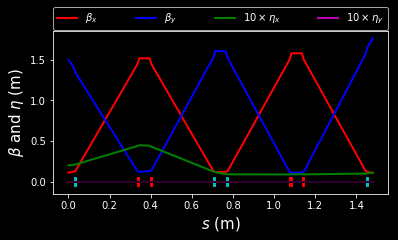


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  1.100e-01  0.000e+00  0.000e+00  2.000e-02  0.000e+00  1.500e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.480e+00  1.052e-01  1.863e-02  6.859e-01  1.118e-02  5.495e-02  1.767e+00 -6.385e-02  6.953e-01  0.000e+00  0.000e+00

Tune: nux =       0.686, nuy =       0.695




In [21]:
# --- a format of simplified version
alist = line.getMatLine()
bline = latt.beamline(alist,betax0=0.11,betay0=1.5,etax0=0.02)
bline.plttwiss(figsize=(6,3))
print(bline)

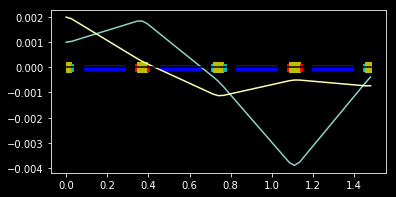

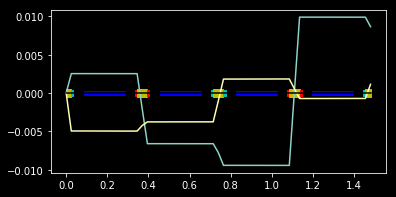

array([ -3.84549618e-04,   8.63917074e-03,  -7.30620159e-04,
         1.12995634e-03,  -6.91175641e-05,  -1.00000000e-04])

In [22]:
# --- tracking a virtual partcile with a given initial condition
x = line.eletrack(x0=[0.001,0,0.002,0,0,-0.0001])
plt.figure(figsize=(6,3))
plt.plot(line.s,x[:,0,0])
plt.plot(line.s,x[:,2,0])
line.pltmag(unit=0.0002)
plt.show()
plt.figure(figsize=(6,3))
plt.plot(line.s,x[:,1,0])
plt.plot(line.s,x[:,3,0])
line.pltmag(unit=0.0005)
plt.show()

x[-1,:,0]

In [23]:
# --- get the linear matrix between any two points (indexes)
R = line.getTransMat()
latt.printmatrix(R)
R.dot([0.001,0,0.002,0,0,-0.0001])

-0.383110  -0.098968   0.000000   0.000000   0.000000   0.018847  
 8.621231  -0.383110   0.000000   0.000000   0.000000  -0.117478  
 0.000000   0.000000  -0.366034  -1.532845   0.000000   0.000000  
 0.000000   0.000000   0.564975  -0.366034   0.000000   0.000000  
-0.117478   0.018847   0.000000   0.000000   1.000000   0.005847  
 0.000000   0.000000   0.000000   0.000000   0.000000   1.000000  


array([-0.00038499,  0.00863298, -0.00073207,  0.00112995, -0.00011806,
       -0.0001    ])

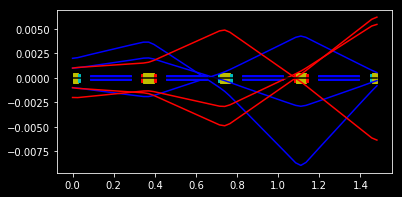

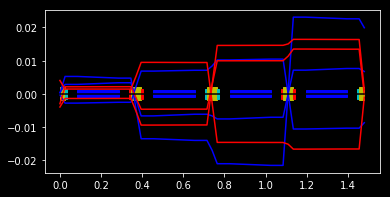

In [24]:
# --- tracking multiple particles with given their initial conditions
x0 = np.array([[0.001,0.0003,-0.001,-0.004,0,0.01],
               [0.002,0.0001,-0.002,-0.003,0,-0.01],
               [-0.001,-0.0003,0.001,0.004,0,0.005]]).transpose()
x = line.eletrack(x0,fast=1)
plt.figure(figsize=(6,3))
plt.plot(line.s,x[:,0,:],'b')
plt.plot(line.s,x[:,2,:],'r')
line.pltmag(unit=0.0005)
plt.show()
plt.figure(figsize=(6,3))
plt.plot(line.s,x[:,1,:],'b')
plt.plot(line.s,x[:,3,:],'r')
line.pltmag(unit=0.002)
plt.show()

## Periodical structure 

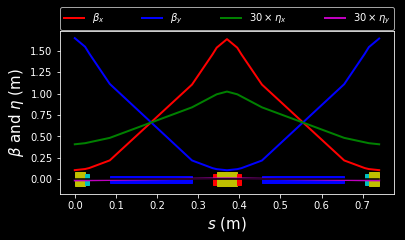


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  1.078e-01 -1.335e-16  0.000e+00  1.363e-02  3.988e-16  1.647e+00  4.030e-16  0.000e+00 -4.093e-04 -0.000e+00
  7.400e-01  1.075e-01 -1.547e-03  3.433e-01  1.363e-02  4.025e-16  1.642e+00 -1.917e-03  3.448e-01 -4.093e-04  8.674e-19

Tune: nux =       0.343, nuy =       0.345






In [25]:
d1 = latt.drif('d1',L=0.05)
b1 = latt.bend('b1',L=0.2,angle=0.05,e1=0.025,e2=0.025)
qf = latt.quad('qf',L=0.025,K1=100,tilt=20e-3)
qd = latt.quad('qd',L=0.025,K1=-100,tilt=20e-3)
sf = latt.sext('sf',L=0.01,K2=5)
od = latt.octu('od',L=0.01,K3=-15)
bl = [qd,od,d1,b1,d1,sf,qf,qf,sf,d1,b1,d1,od,qd]

# --- Keyword for a periodical structure is "cell"
acell = latt.cell(bl)
acell.plttwiss(figsize=(6,3),etaxfactor=30,etayfactor=30,surflvl=-0.)
print(acell)

-0.555377   0.089610   0.000130  -0.025480   0.000000   0.021207  
-7.758697  -0.555377  -0.145124  -0.000191   0.000000   0.105729  
-0.000191  -0.025480  -0.563014   1.360779   0.000000  -0.000637  
-0.145124   0.000130  -0.504647  -0.563014   0.000000   0.001772  
 0.105729   0.021207   0.001772  -0.000637   1.000000   0.000682  
 0.000000   0.000000   0.000000   0.000000   0.000000   1.000000  


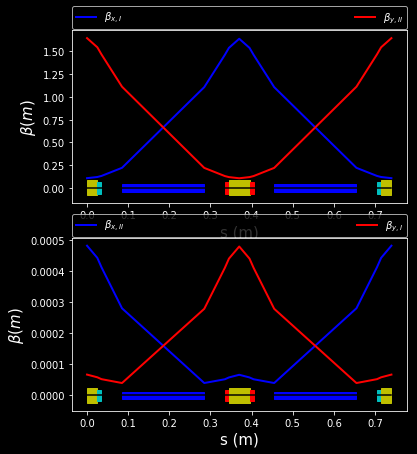

In [26]:
# --- There are tilt angles in quads, thus you should use full-coupled mode
latt.printmatrix(acell.R)
acell.coupledTwiss()
acell.pltcoupledtwiss(figsize=(6,7))

In [27]:
acell.coupledemit()
print("emit_I  = %.4e\nemit_II  = %.4e"%(acell.emit_I,acell.emit_II))

emit_I  = 3.7340e+00
emit_II  = 2.4432e-02


## Load beamline from an existing file

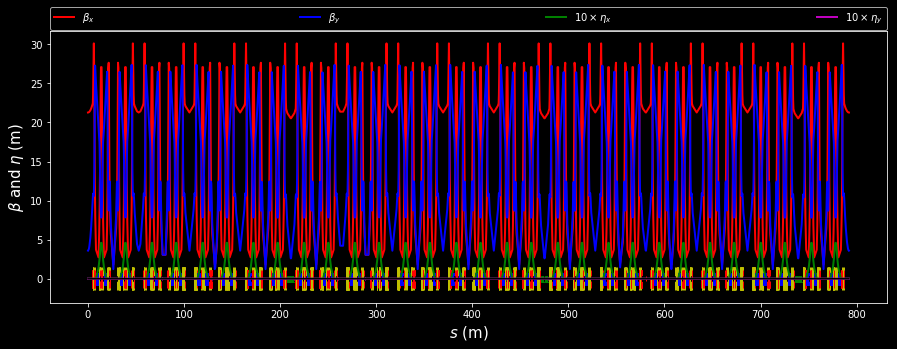


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  2.127e+01  4.961e-05  0.000e+00 -2.410e-04 -3.857e-07  3.589e+00  2.327e-03  0.000e+00 -0.000e+00 -0.000e+00
  7.920e+02  2.127e+01  4.961e-05  3.322e+01 -2.410e-04 -3.857e-07  3.589e+00  2.327e-03  1.626e+01 -0.000e+00  0.000e+00

Tune: nux =      33.221, nuy =      16.263

Horizontal emittance [nm.rad] =   2.087e+00

Momentum compactor alphac =   3.627e-04

Radiation damping factor: D =  -9.149e-04

Radiation damping partition factors: Jx =   1.001e+00, Jy =   1.000e+00, Je =   1.999e+00

Radiation damping time [ms]: taux =   5.529e+01, tauy =   5.534e+01, taue =   2.768e+01

Radiation loss per turn U0 [keV] = 

In [28]:
import nsls2sr_dw_20141119 as nsls2
nsls2.ring.rad()
nsls2.ring.plttwiss(figsize=(15,5))
print nsls2.ring

In [29]:
quads = nsls2.ring.getElements('quad','qh')
for q in quads:
    q.tilt = np.random.randn()*0.2e-3
nsls2.ring._update()
nsls2.ring.coupledTwiss()
#nsls2.ring.pltcoupledtwiss(figsize=(20,10))
nsls2.ring.coupledemit()
print("emit_I  = %.4f\nemit_II  = %.4f\n" \
      %(nsls2.ring.emit_I,nsls2.ring.emit_II))
print nsls2.ring.emit_II/nsls2.ring.emit_I*100

# --- recover
for q in quads:
    q.tilt = 0

emit_I  = 2.0922
emit_II  = 0.0007

0.0353947471381


In [30]:
import nsls2sr_bare_20141015 as nsls2
reload(latt)
reload(nsls2)

# --- merge neigboring drifts into one
aring = latt.cell(nsls2.ring.cmbdrf())
[a.name for a in aring.bl if a.__class__.__name__=='drif'][:10]

['d0001',
 'd0002',
 'd0003',
 'd0004',
 'd0005',
 'd0006',
 'd0007',
 'd0008',
 'd0009',
 'd0010']

## using findCloseOrbit function to calculate ORM

closed orbit found after 23 iterations


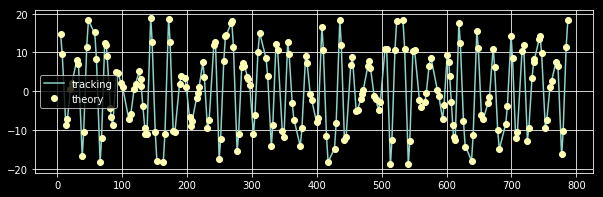

In [31]:
kicks = aring.getElements('kick','c')
kick = kicks[0]
kick.hkick = 0.02e-3
xco,xpco,yco,pco,isconv,dl = aring.findClosedOrbit(verbose=1)

import h5py

bpmindex = aring.getIndex('moni')
plt.figure(figsize=(10,3))
plt.plot(aring.s[bpmindex],xco[bpmindex]/0.02e-3,label='tracking')
fn = h5py.File('/Users/yli/Dropbox/Li_Yongjun/pylatt-dev/nsls2sr_dw_rm_20141119.h5','r')
plt.plot(aring.s[bpmindex],fn[u'OrbitResponseMatrix']['m'][:198,0],'o',label='theory')
plt.legend()
plt.grid()
plt.show()

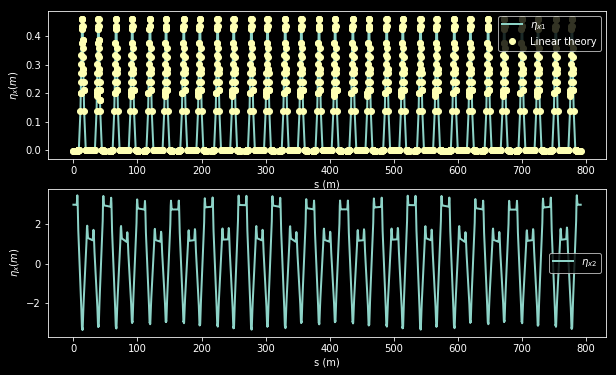

In [32]:
aring.dispersionTrack(dE=np.linspace(-1.5e-2,1.5e-2,16),deg=3,mp=1,verbose=1,figsize=(10,6))

--- tracking: 0128 out of 0128 is being done (100%) ---

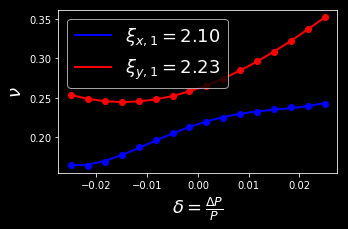

In [33]:
aring.chromTrack(nturn=128,verbose=1,tunewindow=0.2,figsize=(5,3))

In [34]:
aring.chyTrack

array([ -1.46057740e+03,  -4.10252572e+02,   6.66047420e+01,
         2.22607572e+00,   2.61588679e-01])

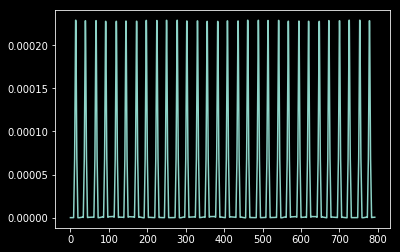

In [35]:
import nsls2sr_dw_20141119 as nsls2
reload(nsls2)
x = nsls2.ring.eletrack([0,0,0,0,0,0.0005])
plt.plot(nsls2.ring.s,x[:,0,0])
plt.show()
nsls2.ring.rad()

In [36]:
import property_template as pt
reload(pt)
alist = ['Uw','Ut',"emitxw","sigew","tauw","tauxw","tauyw","tauew"]
for l in alist:
    print pt.proptemp(l,ponly=1)

    @property
    def Uw(self):
        return self._Uw

    @property
    def Ut(self):
        return self._Ut

    @property
    def emitxw(self):
        return self._emitxw

    @property
    def sigew(self):
        return self._sigew

    @property
    def tauw(self):
        return self._tauw

    @property
    def tauxw(self):
        return self._tauxw

    @property
    def tauyw(self):
        return self._tauyw

    @property
    def tauew(self):
        return self._tauew



In [37]:
# --- learning 1
import multiprocessing
import os

dE = np.linspace(-1.5e-2,1.5e-2,16)
data = [[aring,de] for de in dE]

def mp_worker((thering,de)):
    xco,xpco,yco,ypco,c,dl = thering.findClosedOrbit(fixedenergy=de,sym4=True,niter=100)
    print os.getpid(),':',de,xco[0]
    
def mp_handler():
    p = multiprocessing.Pool(4)
    p.map(mp_worker,data)

mp_handler()

82302 : -0.009 0.000625890656033
82301 : -0.011 0.000765059553482
82300 : -0.013 0.000928181616538
82299 : -0.015 0.00111775108745
82302 : -0.007 0.000515553154507
82300 : -0.003 0.000371077453983
82299 : -0.001 0.000337938003906
82301 : -0.005 0.000430615521718
82302 : 0.001 0.000327195251607
82300 : 0.003 0.000340772435705
82299 : 0.005 0.000377570155281
82301 : 0.007 0.000436993615798
82302 : 0.009 0.000518408201118
82300 : 0.011 0.000621162927306
82301 : 0.015 0.000886603044608
82299 : 0.013 0.000743316623968


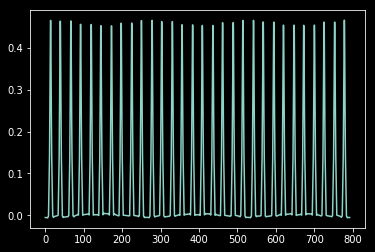

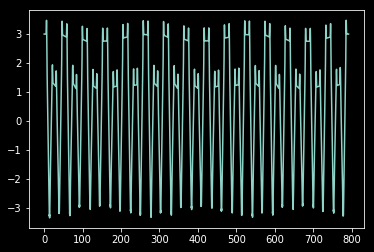

In [38]:
# --- learning 2
from multiprocessing import Process, Queue

def f(q,aring,de):
    xco,xpco,yco,ypco,c,dl = aring.findClosedOrbit(fixedenergy=de,sym4=True,niter=100)
    q.put([de, xco])

#if __name__ == '__main__':
def handler(Thering,dE):
    q = [Queue() for i in range(len(dE))]
    p = [Process(target=f, args=(qi,Thering,de)) for de,qi in zip(dE,q)]
    [pii.start() for pii in p]
    result = [qi.get() for qi in q]
    [pii.join() for pii in p]
    return result

dE = np.linspace(-1.5e-2,1.5e-2,16)
result = handler(aring,dE)

e,x = [],[]
for a in result:
    e.append(a[0])
    x.append(a[1])
idx = np.argsort(e)
e = np.array(e)[idx]
x = np.array(x)[idx]
disp = np.polyfit(e,x,3)

plt.plot(aring.s,disp[-2])
plt.show()
plt.plot(aring.s,disp[-3])
plt.show()

In [39]:
# --- learning 3
from multiprocessing import Process, Queue

def f(q,i):
    q.put([i, None, 'hello'])

if __name__ == '__main__':
    n = 3
    q = [Queue() for i in range(n)]
    p = [Process(target=f, args=(qi,i)) for i,qi in zip(range(n),q)]
    [pii.start() for pii in p]
    print [qi.get() for qi in q]
    [pii.join() for pii in p]

[[0, None, 'hello'], [1, None, 'hello'], [2, None, 'hello']]


20.475221539 3.36706303586 1.84345214665 1.17040532107 1.1073760063 0.541992771394


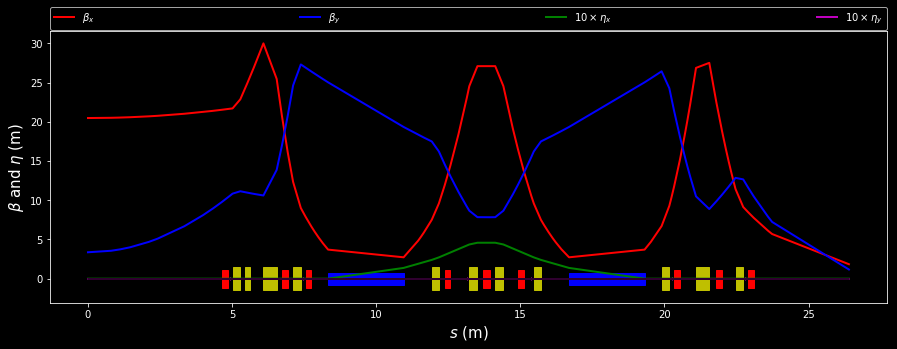

In [40]:
reload(latt)
import nsls2sr_bare_20141015 as nsls2
reload(nsls2)

se = nsls2.ring.getSIndex(nsls2.ring.L/30)

bx0 = nsls2.ring.betax0
by0 = nsls2.ring.betay0
bx1 = nsls2.ring.betax[se[0]]
by1 = nsls2.ring.betay[se[0]]
nux = nsls2.ring.mux[se[0]]
nuy = nsls2.ring.muy[se[0]]

print bx0,by0,bx1,by1,nux,nuy

se = nsls2.ring.getSIndex(nsls2.ring.L/30)
acell = latt.beamline(nsls2.ring.bl[:se[0]],betax0=bx0,betay0=by0)
acell.plttwiss()

In [41]:
quads = acell.getElements('quad','q')[7:]
variables = [[quad,'K1'] for quad in quads]
constraints = [#['betax',-1,bx1],['betay',-1,by1],
               ['alfax',-1,0],['alfay',-1,0],
               ['mux',-1,nux-0.02/30],['muy',-1,nuy+0.02/30]]
weights = [50,50,10,10]
latt.optm(acell,variables,constraints,weights,
          maxiter=200000,maxfun=200000,disp=1,
          xtol=1e-9,ftol=1e-9)

#acell.plttwiss()
acell

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 126
         Function evaluations: 241

Totally 1.62s is used for optimization.

ql3g6c30b: quad,L=0.268,K1=-1.51276,tilt=0
ql2g6c30b: quad,L=0.46,K1=1.76649,tilt=0
ql1g6c30b: quad,L=0.268,K1=-1.63399,tilt=0



-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  2.048e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00  3.367e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  2.640e+01  1.865e+00  6.288e-07  1.107e+00 -4.508e-05 -2.454e-05  1.145e+00  5.262e-07  5.427e-01  0.000e+00  0.000e+00

Tune: nux =       1.107, nuy =       0.543


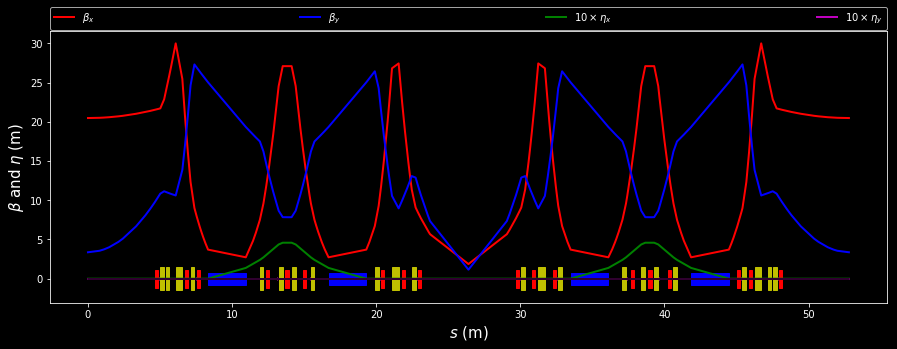

In [42]:
fring = latt.cell(1*(acell.bl+acell.bl[::-1]))
fring.plttwiss()